<a href="https://colab.research.google.com/github/ravirajgm/Raviraj_Data_Science_Case_Studies/blob/main/Random_Forest_Classifier_TelcoDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Classification Analysis of Telco Data with Variable importance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from pandas.api.types import is_numeric_dtype

In [2]:
#Load the Telco data for one month
telcodf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telcodf.columns = [c[0].lower() + c[1:] for c in telcodf.columns]
telcodf['seniorCitizen'] = telcodf['seniorCitizen'].map({1:'Yes',0:'No'})
telcodf['label'] = telcodf['churn'].map({'Yes':1,'No':0})
telcodf['totalCharges'] = pd.to_numeric(telcodf['totalCharges'],errors='coerce')
telcodf.sample(5)

,customerID,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn,label
3794,4280-DLSHD,Male,No,Yes,No,8,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,54.75,445.85,No,0
1786,7530-HDYDS,Female,No,No,No,38,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),84.25,3264.50,Yes,1
6215,2446-BEGGB,Female,Yes,No,No,6,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.25,560.60,Yes,1
1754,3658-QQJYD,Male,No,No,No,62,Yes,No,DSL,Yes,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),74.30,4698.05,No,0
6968,8685-WHQPW,Female,Yes,No,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.40,1692.60,Yes,1


In [3]:
#Fill null values of totalCharges with mean values
telcodf['totalCharges'] = telcodf['totalCharges'].fillna(telcodf['totalCharges'].mean())
telcodf.isnull().sum()


customerID          0
gender              0
seniorCitizen       0
partner             0
dependents          0
tenure              0
phoneService        0
multipleLines       0
internetService     0
onlineSecurity      0
onlineBackup        0
deviceProtection    0
techSupport         0
streamingTV         0
streamingMovies     0
contract            0
paperlessBilling    0
paymentMethod       0
monthlyCharges      0
totalCharges        0
churn               0
label               0
dtype: int64

In [4]:
telcodf.drop(columns=['customerID','churn'], axis=1)

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,label
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [5]:
#Identify categorcal & continuous variables
continuous, categorical = [], []

for col in [c for c in telcodf.columns if c != 'label']:
    if is_numeric_dtype(telcodf[col]):
        continuous.append(col)
    else:
        categorical.append(col)

In [6]:
#Create dummy variables for categorical variables:
dummy_gender = pd.get_dummies(telcodf['gender'])
dummy_srcitizen = pd.get_dummies(telcodf['seniorCitizen'])
dummy_partner  = pd.get_dummies(telcodf['partner'])
dummy_dependents = pd.get_dummies(telcodf['dependents'])
dummy_paperlessBilling  = pd.get_dummies(telcodf['paperlessBilling'])
dummy_paymentMethod = pd.get_dummies(telcodf['paymentMethod'])
dummy_contract = pd.get_dummies(telcodf['contract'])
dummy_streamingMovies = pd.get_dummies(telcodf['streamingMovies'])
dummy_streamingTV = pd.get_dummies(telcodf['streamingTV'])
dummy_techSupport = pd.get_dummies(telcodf['techSupport'])
dummy_deviceProtection = pd.get_dummies(telcodf['deviceProtection'])
dummy_onlineBackup = pd.get_dummies(telcodf['onlineBackup'])
dummy_onlineSecurity = pd.get_dummies(telcodf['onlineSecurity'])
dummy_internetService = pd.get_dummies(telcodf['internetService'])
dummy_multipleLines = pd.get_dummies(telcodf['multipleLines'])
dummy_phoneService = pd.get_dummies(telcodf['phoneService'])

In [7]:
telcodf_rf = pd.concat([telcodf[continuous], telcodf['label'],dummy_gender, dummy_srcitizen, dummy_partner, dummy_dependents, dummy_paperlessBilling, dummy_paymentMethod, dummy_contract, dummy_streamingMovies, dummy_streamingTV,dummy_techSupport, dummy_deviceProtection,dummy_onlineBackup,dummy_onlineSecurity,dummy_internetService,dummy_multipleLines,dummy_phoneService],axis=1)
telcodf_rf.sample(5)

,tenure,monthlyCharges,totalCharges,label,Female,Male,No,Yes,No,Yes,No,Yes,No,Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year,No,No internet service,Yes,No,No internet service,Yes,No,No internet service,Yes,No,No internet service,Yes,No,No internet service,Yes,No,No internet service,Yes,DSL,Fiber optic,No,No,No phone service,Yes,No,Yes
6195,4,72.2,305.55,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
1835,1,45.0,45.00,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2888,1,71.0,71.00,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1528,19,56.2,1093.40,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2069,1,95.6,95.60,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1


Run Random Classifier on the one-hot encoded categorical data

In [8]:
x_train,x_test,y_train,y_test = train_test_split(telcodf_rf.drop(['label'],axis=1),telcodf_rf['label'],train_size = 0.7,random_state=42)
           
rf_fit = RandomForestClassifier(n_estimators=1000,criterion="gini",max_depth=100,min_samples_split=3,min_samples_leaf=2)
rf_fit.fit(x_train,y_train)           

print ("\nRandom Forest - Train Confusion Matrix\n\n",pd.crosstab(y_train,rf_fit.predict(x_train),rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Train accuracy",round(accuracy_score(y_train,rf_fit.predict(x_train)),3))

print ("\n\nRandom Forest - Test Confusion Matrix\n\n",pd.crosstab(y_test,rf_fit.predict(x_test),rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test,rf_fit.predict(x_test)),3))


Random Forest - Train Confusion Matrix

 Predicted     0     1
Actual               
0          3553    82
1           257  1038

Random Forest - Train accuracy 0.931


Random Forest - Test Confusion Matrix

 Predicted     0    1
Actual              
0          1403  136
1           287  287

Random Forest - Test accuracy 0.8


The accuracy for Testing is 0.8 which is a good fit and it is lesser than the Training which is 0.92

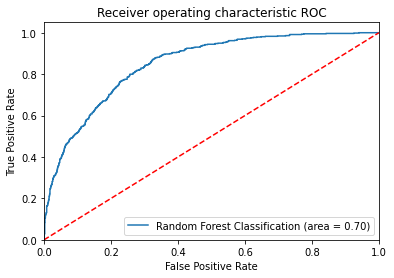

In [ ]:
rf_roc_auc = roc_auc_score(y_test, rf_fit.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_fit.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

The ROC curve looks fine with area coverage of 0.7

ROC AUC Score of 0.84 looks fine and acceptable

In [ ]:
y_pred_proba = rf_fit.predict_proba(x_test)[::,1]
roc_auc_score(y_test, y_pred_proba)

0.8496365122381383

Visualize the Decision Tree in a tree.png file

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf_fit.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('/content/drive/MyDrive/Colab Notebooks/Data/tree.png')

In [ ]:
feature_list = list(telcodf.drop(columns=['customerID','churn','label']).columns)
feature_list

['gender',
 'seniorCitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneService',
 'multipleLines',
 'internetService',
 'onlineSecurity',
 'onlineBackup',
 'deviceProtection',
 'techSupport',
 'streamingTV',
 'streamingMovies',
 'contract',
 'paperlessBilling',
 'paymentMethod',
 'monthlyCharges',
 'totalCharges']

Feature Importance evaluation for predictive power
The top variables contribute more to the model than the bottom ones and also have high predictive power in
classifying default and non-default customers.

In [ ]:
# Get numerical feature importances

importances = list(rf_fit.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: gender               Importance: 0.15
Variable: partner              Importance: 0.15
Variable: seniorCitizen        Importance: 0.12
Variable: paperlessBilling     Importance: 0.07
Variable: streamingMovies      Importance: 0.03
Variable: monthlyCharges       Importance: 0.02
Variable: dependents           Importance: 0.01
Variable: tenure               Importance: 0.01
Variable: phoneService         Importance: 0.01
Variable: multipleLines        Importance: 0.01
Variable: internetService      Importance: 0.01
Variable: onlineSecurity       Importance: 0.01
Variable: onlineBackup         Importance: 0.01
Variable: deviceProtection     Importance: 0.01
Variable: techSupport          Importance: 0.01
Variable: streamingTV          Importance: 0.01
Variable: contract             Importance: 0.01
Variable: paymentMethod        Importance: 0.01
Variable: totalCharges         Importance: 0.01


In [ ]:
telcodf_rf

In [9]:
telcodf_impfeatures = pd.concat([dummy_gender, dummy_srcitizen, dummy_partner, dummy_paperlessBilling, dummy_streamingMovies, telcodf[['monthlyCharges','label']]], axis=1)
telcodf_impfeatures.head(2)


,Female,Male,No,Yes,No,Yes,No,Yes,No,No internet service,Yes,monthlyCharges,label
0,1,0,1,0,0,1,0,1,1,0,0,29.85,0
1,0,1,1,0,1,0,1,0,1,0,0,56.95,0


Run the Random Forest Classifier again with features selected as important

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(telcodf_impfeatures.drop(['label'],axis=1),telcodf_impfeatures['label'],train_size = 0.7,random_state=42)
           
rf_fit_imp = RandomForestClassifier(n_estimators=1000,criterion="gini",max_depth=100,min_samples_split=3,min_samples_leaf=2)
rf_fit_imp.fit(x_train,y_train)           

print ("\nRandom Forest - Train Confusion Matrix\n\n",pd.crosstab(y_train,rf_fit_imp.predict(x_train),rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Train accuracy",round(accuracy_score(y_train,rf_fit_imp.predict(x_train)),3))

print ("\n\nRandom Forest - Test Confusion Matrix\n\n",pd.crosstab(y_test,rf_fit_imp.predict(x_test),rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test,rf_fit_imp.predict(x_test)),3))


Random Forest - Train Confusion Matrix

 Predicted     0    1
Actual              
0          3465  170
1           465  830

Random Forest - Train accuracy 0.871


Random Forest - Test Confusion Matrix

 Predicted     0    1
Actual              
0          1311  228
1           367  207

Random Forest - Test accuracy 0.718


In [ ]:
y_pred_proba = rf_fit_imp.predict_proba(x_test)[::,1]
roc_auc_score(y_test, y_pred_proba)

0.672327272562617

Grid search has been performed by changing various hyperparameters

In [10]:
# Grid Search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

pipeline = Pipeline([('clf',RandomForestClassifier(criterion='gini'))])

parameters = {
        'clf__n_estimators':(1000,2000,3000),
        'clf__max_depth':(100,200,300),
        'clf__min_samples_split':(2,3),
        'clf__min_samples_leaf':(1,2)  }

grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1,cv=5,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)

print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(x_test)

print ("Testing accuracy:",round(accuracy_score(y_test, predictions),4))
print ("\nComplete report of Testing data\n",classification_report(y_test, predictions))

print ("\n\nRandom Forest Grid Search- Test Confusion Matrix\n\n",pd.crosstab(y_test, predictions,rownames = ["Actual"],colnames = ["Predicted"])) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 22.5min finished


Best Training score: 0.795
Best parameters set:
	clf__max_depth: 200
	clf__min_samples_leaf: 2
	clf__min_samples_split: 2
	clf__n_estimators: 1000
Testing accuracy: 0.8017

Complete report of Testing data
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.50      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



Random Forest Grid Search- Test Confusion Matrix

 Predicted     0    1
Actual              
0          1407  132
1           287  287


## **Conclusion**: The GridSearchCV has wrongly categorized 287 customers as non-churn who would churn - this is an improvement by 35 customers compared to Logistic Regression approach